In [1]:
import SimpleITK as sitk
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

In [2]:
ROOT_DIR = "/pylon5/ac5616p/Data/HeartSegmentationProject/CAP_challenge/CAP_challenge_training_set/test2/ants"
os.chdir(ROOT_DIR)
fixed="fixed.nii"
moving="moving.nii"

In [11]:
def plot_points_on_grid(x,y,z,array):
    '''x,y,z are indices, not pixel coordinates'''
    
    fig,[ax1, ax2, ax3]=plt.subplots(1,3,figsize=(15,15))

    # along x axis
    ax1.imshow(array[x,:,:],origin="lower")
    rect=patches.Rectangle((z-15,y-15),30,30,facecolor='none',edgecolor='r')
    ax1.plot(z,y,'o')
    ax1.add_patch(rect)
    
    # along y axis
    ax2.imshow(array[:,y,:],origin="lower")
    rect=patches.Rectangle((z-15,x-15),30,30,facecolor='none',edgecolor='r')
    ax2.plot(z,x,'o')
    ax2.add_patch(rect)
    
    # along z axis
    ax3.imshow(array[:,:,z],origin="lower")
    rect=patches.Rectangle((y-15,x-15),30,30,facecolor='none',edgecolor='r')
    ax3.plot(y,x,'o')
    ax3.add_patch(rect)
    
    plt.show()
    
def pixel_to_point(pixel):
    return pixel[2]-1, pixel[1]-1,pixel[0]-1

In [12]:
fixed_image=sitk.ReadImage(fixed)
moving_image=sitk.ReadImage(moving)
image1=sitk.ReadImage('transInverseWarp.nii.gz')
image2=sitk.ReadImage('movingWarped.nii.gz')
image3=sitk.ReadImage('fixedWarped.nii.gz')
image4=sitk.ReadImage('transWarp.nii.gz')

target_pixel_on_fixed=(110,97,102)

In [13]:
inverse_affine=sitk.ReadTransform('brain0GenericAffine.mat').GetInverse()
inverse_displacement=sitk.DisplacementFieldTransform(image1)
composite_transform = sitk.Transform(inverse_displacement)
composite_transform.AddTransform(inverse_affine)
physical_cor_on_fixed=fixed_image.TransformIndexToPhysicalPoint(target_pixel_on_fixed)
print('physical_cor_on_fixed', physical_cor_on_fixed)
physical_cor_on_moving=composite_transform.TransformPoint(physical_cor_on_fixed)
print('physical_cor_on_moving',physical_cor_on_moving)
target_pixel_on_moving=moving_image.TransformPhysicalPointToIndex(physical_cor_on_moving)
print('target_pixel_on_moving',target_pixel_on_moving)

physical_cor_on_fixed (-28.670015095733277, 15.88498595543196, 1.6246939022093034)
physical_cor_on_moving (-37.976994574796336, 21.646443551345367, -30.828628608413513)
target_pixel_on_moving (91, 150, 91)


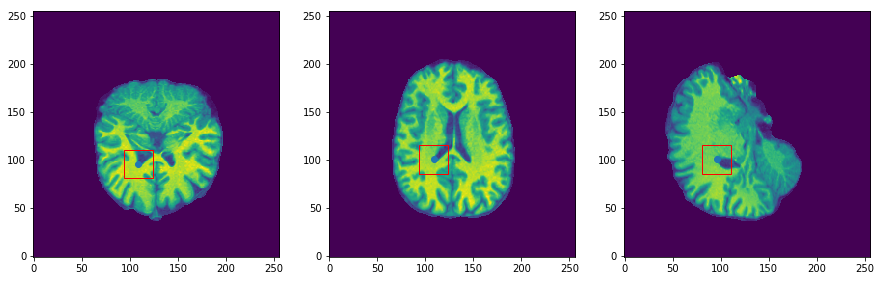

In [14]:
x,y,z=pixel_to_point(target_pixel_on_fixed)
plot_points_on_grid(x,y,z,sitk.GetArrayFromImage(fixed_image))

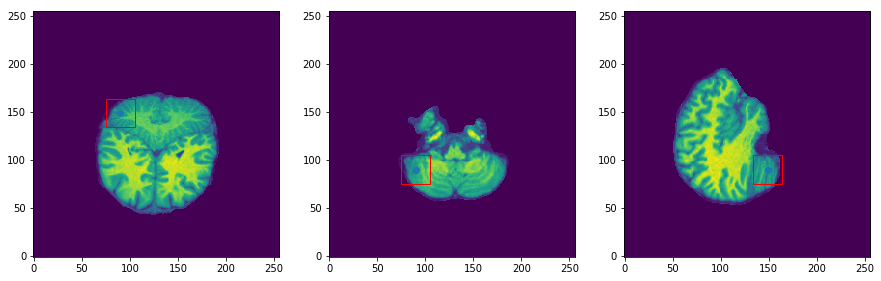

In [15]:
x_,y_,z_=pixel_to_point(target_pixel_on_moving)
plot_points_on_grid(x_,y_,z_,sitk.GetArrayFromImage(moving_image))